## Лабораторная работа № 1 по глубокому обучению

### Реализация нейронной сети для решения задачи классификации без использования библиотек глубокого обучения

#### Цель и задачи работы:
1. Получить представление о принципах работы нейронных сетей и их отдельных слоев.
2. Разобраться с механизмом обратного распространения ошибки в нейросетях.
3. Применить на практике метод стохастического градиентного спуска.
4. Получить навыки реализации нейронных сетей с использованием языка Python и библиотеки NumPy.

Нейронные сети обучаются с использованием механизма обратного распространения ошибки. Для каждого входного набора данных (мини-батча) с помощью преобразований нейронной сети рассчитывается значение функции ошибки. Это -- так называемый прямой проход: данные распространяются от первых слоев сети к последним. После вычисления значения функции ошибки начинается послойный расчет градиента от нее по весам в обратном направлении сети. В этом заключается обратный проход: распространение градиентов от конца нейронной сети к ее началу. После него ко всем весам всех слоев нейронной сети применяется шаг градиентного спуска, в результате которого веса коррелируются. После чего процесс повторяется вновь (скорее всего, с другой порцией данных (мини-батчем)).

Для реализации обучения нейронной сети для каждого слоя необходимо получить аналитическое выражение прямого и обратного проходов в векторном виде.

#### Прямой и обратный проход для полносвязного слоя
Линейное преобразование признаков полносвязного слоя может быть записано в виде:

$$Y = XW^T, \; Y \in \mathbb{R}^{m \times d}, \; X \in \mathbb{R}^{m \times n}, \; W \in \mathbb{R}^{d \times n} $$

Вычислим производные функции от эмпирического риска по входам. Будем использовать деноминаторную нотацию, согласно которой:

$$\left( \frac{\partial Q}{\partial W} \right)_{ij} = \frac{\partial Q}{\partial w_{ij}}$$

Учитывая, что $Q = Q \left( y_{11}\left(x_{ij}, ...\right), y_{12}\left(x_{ij}, ...\right), y_{21}\left(x_{ij}, ...\right), ... \right)$, воспользуемся выражением для производной сложной функции (chain rule) от нескольких независимых переменных:

$$\left( \frac{\partial Q}{\partial W} \right)_{ij} = \frac{\partial Q}{\partial w_{ij}} = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \frac{\partial y_{pq}}{\partial w_{ij}} } = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \frac{\partial }{\partial w_{ij}} \left( \sum_k {x_{pk} w^T_{kq}} \right) } = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \sum_k{x_{pk} \frac{\partial w_{qk}}{\partial w_{ij}}} } $$

Принимая во внимание, что все $w_{rs}$ функционально друг с другом не связаны, и производная $\frac{\partial w_{qk}}{\partial w_{ij}}$ отлична от нуля только при $k=j$, $q=i$, получаем, что из суммы по $k$ останется только одно слагаемое. Тогда:

$$\left( \frac{\partial Q}{\partial w} \right)_{ij} = \sum_p { \frac{\partial Q}{\partial y_{pi}} x_{pj}} = \sum_p { \left( \frac{\partial Q}{\partial Y} \right)^T_{ip} x_{pj}}$$

В векторном виде соотношение примет вид:

$$\frac{\partial Q}{\partial W} = \left( \frac{\partial Q}{\partial Y} \right)^T X$$

Аналогичным образом находим производную по $x$:

$$\left( \frac{\partial Q}{\partial X} \right)_{ij} = \frac{\partial Q}{\partial x_{ij}} = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \frac{\partial y_{pq}}{\partial x_{ij}} } = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \frac{\partial }{\partial x_{ij}} \left( \sum_k {x_{pk} w^T_{kq}} \right) } = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \sum_k{w^T_{kq} \frac{\partial x_{pk}}{\partial x_{ij}}} } = $$

$$ = \sum_q { \frac{\partial Q}{\partial y_{iq}} w^T_{jq}} = \sum_q { \left( \frac{\partial Q}{\partial Y} \right)_{iq} w_{qj}} $$

Или, в векторном виде:

$$\frac{\partial Q}{\partial X} = \frac{\partial Q}{\partial Y} W $$

#### Прямой и обратный проход для сигмоидальной функции активации
Сигма-функция применяется поэлементно к матрице входных значений:

$$Y = \sigma \left( X \right) = \left\{ \left\{ \frac{1}{1 + e^{-x_{ij}}} \right\}_{j=1}^n \right\}_{i=1}^m, \; Y \in \mathbb{R}^{m \times n}, \; X \in \mathbb{R}^{m \times n}$$

Сигма-функция не содержит обучаемых параметров (весов). Поэтому, нужно выразить только производную от эмпирического риска по входу:

$$\left( \frac{\partial Q}{\partial X} \right)_{ij} = \frac{\partial Q}{\partial x_{ij}} = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \frac{\partial y_{pq}}{\partial x_{ij}} } = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \frac{\partial  \sigma \left( x_{pq} \right)}{\partial x_{ij}}} = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}}  \frac{\partial }{\partial x_{ij}} \left[ \frac{1}{1 + e^{-x_{pq}}} \right]  }  = $$

$$ = \sum_p \sum_q { \frac{\partial Q}{\partial y_{pq}} \frac{-e^{-x_{pq}}}{\left( 1 + e^{-x_{pq}} \right) \left( 1 + e^{-x_{pq}} \right)} \left( -\frac{\partial x_{pq}}{\partial x_{ij}}\right)  } = \frac{\partial Q}{\partial y_{ij}} \frac{e^{-x_{ij}}}{\left( 1 + e^{-x_{ij}} \right) \left( 1 + e^{-x_{ij}} \right)} = \left( \frac{\partial Q}{\partial Y} \right)_{ij} \frac{e^{-x_{ij}}}{1 + e^{-x_{ij}}} \cdot \frac{1}{1 + e^{-x_{ij}}} = $$

$$ = \left( \frac{\partial Q}{\partial Y} \right)_{ij} \frac{1}{1 + e^{-x_{ij}}} \left( 1 - \frac{1}{1 + e^{-x_{ij}}}\right) = \left( \frac{\partial Q}{\partial Y} \right)_{ij} \left[ \sigma \left( x_{ij} \right) \cdot \left( 1 - \sigma \left( x_{ij} \right) \right) \right] $$

Векторное выражение производной:

$$\frac{\partial Q}{\partial X} = \frac{\partial Q}{\partial Y} \odot \sigma \left( X \right) \odot \left( 1 - \sigma \left( X \right) \right)$$

#### Прямой и обратный проход для совмещенного слоя softmax-NLL

Пусть:
$$Y = a(X,w), \; Y \in \mathbb{R}^{m \times C}$$
$$T \in \{ C_1, C_2, ... C_n \}^m$$

Введем обозначения:

$$ Y^* = \text{softmax}(Y) = \left\{ \frac{1}{\sum_k{e^{y_{ik}}}} \cdot \left[ e^{y_{i1}}, e^{y_{i2}}, e^{y_{i3}} ... e^{y_{iC}}\right]   \right\}_{i=1}^{m}, \quad Y^* \in [0, 1]^{m \times C} $$
$$ T^* = \text{one-hot}(T) = \left\{ \text{one-hot}(t_i) \right\}_{i=1}^{m}, \quad T^* \in \{0, 1\}^{m \times C} $$


Эмпирический риск на основе функции ошибки NLL-Softmax может быть записан в виде:
$$Q\left( Y, T \right) = - \frac{1}{m} \sum_{p=1}^{m} \sum_{q=1}^{C} {t^*_{pq} \log{y^*_{pq}}}$$

Тогда прямой проход будет выполняться следующим образом:

$$Q\left( Y, T \right) = - \frac{1}{m} \sum_{p=1}^{m} \sum_{q=1}^{C} {t^*_{pq} \log{\left[ \frac{e^{y_{pq}}}{\sum_k{e^{y_{pk}}}} \right]}} = - \frac{1}{m} \sum_{p=1}^{m} \sum_{q=1}^{C} {t^*_{pq} y_{pq}} + \frac{1}{m} \sum_{p=1}^{m} {\log \sum_k{e^{y_{pk}}}} = $$

$$ = - \frac{1}{m} \sum_{p=1}^{m} \sum_{q=1}^{C} {\left( T^* \odot Y \right)_{pq}} + \frac{1}{m} \sum_{p=1}^{m} {\log \sum_k{e^{y_{pk}}}} $$

Совмещенный слой sortmax-NLL не содержит обучаемых весов. Поэтому для шага backward поторебуется только производная от функции ошибки по $Y$.

$$ \left(\frac{\partial Q}{\partial Y} \right)_{ij} = \frac{\partial Q}{\partial y_{ij}} = - \frac{1}{m} \sum_{p=1}^{m} \sum_{q=1}^{C} {t^*_{pq} \frac{\partial y_{pq}}{\partial y_{ij}}} + \frac{1}{m} \sum_{p=1}^{m} \frac{\partial}{\partial y_{ij}} \left[ {\log \sum_k{e^{y_{pk}}}} \right] = - \frac{1}{m} t^*_{ij} + \frac{1}{m} \sum_{p=1}^{m} {\frac{1}{ \sum_k{e^{y_{pk}}}} \sum_k{e^{y_{pk}}} \frac{\partial y_{pk}}{\partial y_{ij}}} = - \frac{1}{m} t^*_{ij} + \frac{1}{m} \frac{e^{y_{ij}}}{\sum_k{e^{y_{pk}}}} = - \frac{1}{m} t^*_{ij} + \frac{1}{m} y^*_{ij} = - \frac{1}{m} \left( Y^* - T^* \right)_{ij}$$

В векторном виде выражение запишется в виде:

$$\frac{\partial Q}{\partial Y} = \frac{1}{m} \left( Y^* - T^* \right)$$

#### Реализация обучения нейронной сети
Запустите все ячейки с кодом расположенные ниже. Запуск производится посредством нажатия *Ctrl-Enter* на выделенной ячейке или нажатием кнопки *Run* на панели инструментов ноутбука.

Импортируем необходимые библиотеки, включаем отображение графиков в окне ноутбука и загружаем данные:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


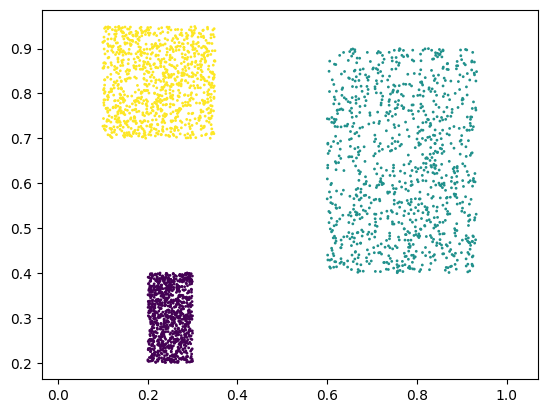

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
%matplotlib inline

data = np.loadtxt(open("/content/drive/MyDrive/vstu_dl_labs/datasets/data.csv", "r"), delimiter=",")
x, y = data[:, [0, 1]], data[:, 2]
plt.scatter(x[:, 0], x[:, 1], s = 1, c = y)
plt.axis('equal')
plt.show()

Просмотрим содержимое обучающей выборки:

In [ ]:
(x, y)

(array([[0.13869, 0.90535],
        [0.14991, 0.91016],
        [0.24432, 0.91934],
        ...,
        [0.15205, 0.93042],
        [0.29014, 0.32522],
        [0.31857, 0.85956]]),
 array([2., 2., 2., ..., 2., 0., 2.]))

То же самое в более красивом виде:

In [ ]:
pd.DataFrame(np.hstack((x, np.expand_dims(y, 1))),
                  columns = ['X','Y', 'Label'])

,X,Y,Label
0,0.13869,0.90535,2.0
1,0.14991,0.91016,2.0
2,0.24432,0.91934,2.0
3,0.61333,0.44312,1.0
4,0.11161,0.87920,2.0
...,...,...,...
2995,0.17494,0.71068,2.0
2996,0.23083,0.35055,0.0
2997,0.15205,0.93042,2.0
2998,0.29014,0.32522,0.0


Метка в датасете представлена в категориальном формате. Закодируем ее *one-hot*-кодировкой.

In [ ]:
def to_categorical(data):
    data = data.astype(int)
    b = np.zeros((data.size, data.max() + 1))
    b[np.arange(data.size), data] = 1
    return b

In [ ]:
y = to_categorical(y)

Посмотрим на полученные данные:

In [ ]:
(x, y)

(array([[0.13869, 0.90535],
        [0.14991, 0.91016],
        [0.24432, 0.91934],
        ...,
        [0.15205, 0.93042],
        [0.29014, 0.32522],
        [0.31857, 0.85956]]),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]]))

Установим размер мини-батча для стохастического градиентного спуска:

In [ ]:
batch_size = 100

Разобъем датасет на "порции мини-батчей" по множеству объектов.

In [ ]:
x = x.reshape([-1, batch_size, x.shape[1]])
y = y.reshape([-1, batch_size, y.shape[1]])

In [ ]:
(x, y)

(array([[[0.13869, 0.90535],
         [0.14991, 0.91016],
         [0.24432, 0.91934],
         ...,
         [0.27066, 0.76656],
         [0.13667, 0.73946],
         [0.25021, 0.23611]],
 
        [[0.24406, 0.8185 ],
         [0.27745, 0.27128],
         [0.78373, 0.82048],
         ...,
         [0.10196, 0.86767],
         [0.24082, 0.22641],
         [0.28005, 0.31997]],
 
        [[0.29359, 0.39839],
         [0.24147, 0.39039],
         [0.24731, 0.34982],
         ...,
         [0.25251, 0.24517],
         [0.72034, 0.77881],
         [0.29357, 0.39726]],
 
        ...,
 
        [[0.2416 , 0.31197],
         [0.11029, 0.79338],
         [0.2692 , 0.26759],
         ...,
         [0.90506, 0.86701],
         [0.62775, 0.5456 ],
         [0.70688, 0.52086]],
 
        [[0.27174, 0.34728],
         [0.13478, 0.90308],
         [0.20259, 0.25001],
         ...,
         [0.61355, 0.47824],
         [0.28158, 0.91958],
         [0.23904, 0.36549]],
 
        [[0.7538 , 0.5879 ],
 

In [ ]:
(x.shape, y.shape)

((30, 100, 2), (30, 100, 3))

Определим интерфейсный класс одного слоя нейронной сети. Он будет содержать три метода:
* *forward*: Метод выполняет основную операцию над входными данными (для выполнения которой слой и предназначен).
* *backward*: Метод рассчитывает градиенты функции ошибки по весам (для выполнения шага градиентного спуска) и градиенты функции ошибки по входной переменной (для передачи градиента дальше по сети).
* *step*: метод осуществляет один шаг градиентного спуска и обновляет веса.

In [ ]:
class Layer:
    def forward(self, x):
        raise NotImplementedError

    def backward(self, dQ_dy):
        raise NotImplementedError

    def step(self, lr):
        raise NotImplementedError

Реализуем данный интерфейс двумя классами, представляющими конкретные слои нейронной сети: полносвязным и сигмоидным.

Допишите в нижерасположенные ячейки необходимые данные (в места, обозначенные как *# Ваш код*)

In [ ]:
np.random.uniform(-1,1,(100 , 100))

array([[ 0.41102797,  0.85684593,  0.38155363, ...,  0.03234772,
         0.58661644, -0.68390632],
       [ 0.24928517, -0.8167187 , -0.21808677, ...,  0.29152478,
         0.49372493, -0.81292641],
       [ 0.24681227, -0.86671756, -0.59037724, ...,  0.69723471,
         0.89481201,  0.1867954 ],
       ...,
       [ 0.410739  , -0.17232086,  0.42992191, ..., -0.85512748,
        -0.22668332,  0.97151895],
       [ 0.32461027,  0.47242437, -0.03442884, ...,  0.11041724,
        -0.97196037,  0.70497916],
       [-0.9779295 , -0.08863465,  0.13959522, ...,  0.4738615 ,
         0.67377916,  0.63193388]])

In [ ]:
ww = np.array([
    [1,2,3],
     [3,4,65],
     [0,100,9]
])
np.max(ww, axis=1)

array([  3,  65, 100])

In [ ]:
ww = np.insert(ww, 0, 1, axis=1)
print(ww)

[[  1   1   2   3]
 [  1   3   4  65]
 [  1   0 100   9]]


In [ ]:
ww @ np.array([[7,1,1,1],[7,1,1,1]]).T

array([[ 13,  13],
       [ 79,  79],
       [116, 116]])

In [ ]:
1 / (1 + np.exp(ww))

array([[2.68941421e-01, 2.68941421e-01, 1.19202922e-01, 4.74258732e-02],
       [2.68941421e-01, 4.74258732e-02, 1.79862100e-02, 5.90009054e-29],
       [2.68941421e-01, 5.00000000e-01, 3.72007598e-44, 1.23394576e-04]])

In [ ]:
np.mean(ww, axis=0)

array([ 1.        ,  1.33333333, 35.33333333, 25.66666667])

In [ ]:
print(np.max(ww, axis=1))
l = np.exp(ww - np.array([np.max(ww, axis=1)]).T)
print(l)
print(l / l.sum())

[  3  65 100]
[[1.35335283e-01 1.35335283e-01 3.67879441e-01 1.00000000e+00]
 [1.60381089e-28 1.18506486e-27 3.22134029e-27 1.00000000e+00]
 [1.01122149e-43 3.72007598e-44 1.00000000e+00 3.01440879e-40]]
[[3.71948394e-02 3.71948394e-02 1.01106056e-01 2.74834755e-01]
 [4.40782973e-29 3.25697012e-28 8.85336268e-28 2.74834755e-01]
 [2.77918811e-44 1.02240617e-44 2.74834755e-01 8.28464300e-41]]


In [ ]:
class DenseLayer(Layer):
    '''
    Конструктор принимает на вход размеры матрицы весов
    и случайным образом инициализирует ее. Не забудьте
    учесть w0 при расчете формы матрицы.
    '''
    def __init__(self, input_size, output_size):

        self.input_size = input_size + 1
        self.output_size = output_size
        self.w = np.random.uniform(-1, 1, (self.output_size, self.input_size))

    '''
    Функция прямого прохода выполняет линейное преобразование
    над входными данными. Входные данные нужно сохранить для
    последующего использования при расчете градиентов. Не
    забудьте добавить вектор единиц в матрицу входных значений.
    '''
    def forward(self, x):
        self.x = np.insert(x, 0, 1, axis=1)
        return self.x @ self.w.T

    '''
    Функция обратного прохода рассчитывает градиенты функции
    ошибки по весам и входной переменной. Градиенты по
    входной переменной нужно вернуть из функции для
    предыдущих слоев сети (градиенты по добавленному вектору
    единиц возвращать не нужно!).
    '''
    def backward(self, dQ_dy):
        self.dQ_dw = dQ_dy.T * np.mean(self.x, axis=0)
        self.dQ_dx = dQ_dy * self.w[:1:]
        return self.dQ_dx

    '''
    Функция выполняет один шаг стохастического градиентного
    спуска, обновляя веса
    '''
    def step(self, learning_rate):
        self.w = self.w - learning_rate * self.dQ_dw

In [ ]:
class SigmoidLayer(Layer):
    '''
    Функция поэлементого применения сигма-функции ко
    всем элементам входной переменной (матрицы или вектора)
    '''
    def forward(self, x):
        self.x = np.array(x)
        self.y = 1 / (1 + np.exp(-self.x))
        return self.y

    '''
    Функция расчета градиентов функции ошибки по входной
    переменной. Обучаемых весов данный слой не содержит,
    поэтому, градиенты по весам отсутствуют.
    '''
    def backward(self, dQ_dy):
        return np.tensordot(np.tensordot(dQ_dy, np.mean(self.y, axis=0), axes=0), (1 - np.mean(self.y, axis=0)), axes=0)

    '''
    Обучаемых весов нет
    '''
    def step(self, learning_rate):
        pass

Реализуем класс функции ошибки. Данный класс реализует совмещенную операцию *Softmax + NLL*.

In [ ]:
class SoftmaxNLL():
    '''
    Реализация операции Softmax + NLL
    y -- матрица степеней уверенности модели в ответах
    t -- матрица one-hot-меток
    '''
    def forward(self, y, t):
        self.y = np.exp(y - np.array([np.max(y, axis=1)]).T)
        self.y /= y.sum()
        self.t = t
        return -np.mean(np.tensordot(self.t, y, axes=0)) + np.mean(np.sum(np.log(y), axis=1))

    '''
    Функция обратного распространения градиентов. Так как
    с данного слоя начинается расчет градиентов, то вход у
    него отсутствует (точнее, тождественно равен единице).
    '''
    def backward(self):
        return np.mean(self.y - self.t)

Реализуем класс всей нейронной сети, состоящей из слоев.

In [ ]:
class NeuralNetwork:
    '''
    В конструктор передается список всех слоев нейронной сети
    '''
    def __init__(self, layers):
        self.layers = layers

    '''
    Во время прямого прохода последовательно выполняется прямой
    проход (и, соответственно, к входным данным применяются
    нужные преобразования) в каждом слое.
    '''
    def forward(self, x):
        y = x
        for layer in self.layers:
            y = layer.forward(y)
        return y

    '''
    Распространение градиентов осуществляется для каждого слоя
    в обратном порядке
    '''
    def backward(self, dL_dy):
        for layer in self.layers[::-1]:
            dL_dy = layer.backward(dL_dy)

    '''
    Применение одного шага градиентного спуска к весам каждого
    слоя
    '''
    def step(self, learning_rate):
        for layer in self.layers:
            layer.step(learning_rate)

Формируем архитектуру сети, создавая список из слоев:

In [ ]:
network_layers = [
    DenseLayer(2, 10),
    SigmoidLayer(),
    DenseLayer(10, 10),
    SigmoidLayer(),
    DenseLayer(10, 3)
]

network = NeuralNetwork(network_layers)
loss_function = SoftmaxNLL()

Формируем функцию обучения нейронной сети

In [ ]:
def fit(x, y, learning_rate, epochs):
    losses = []
    for epoch in range(1, epochs + 1):
        iter_loss = 0.0

        for iteration in range(1, x.shape[0] + 1):
            data_x = x[iteration - 1]
            print(data_x.shape)
            data_y = y[iteration - 1]
            prediction = network.forward(data_x)
            loss = loss_function.forward(prediction, data_y)
            iter_loss += loss
            losses.append(loss)

            dL_dy = loss_function.backward()
            network.backward(dL_dy)
            network.step(learning_rate)

        mean_loss = iter_loss / x.shape[0]
        if (epoch % 50 == 0): print("Epoch: ", epoch, "    mean_loss: ", mean_loss)

    return losses

Запустим процесс обучения сети и сохраним ошибку на каждой итерации.

In [ ]:
losses = fit(x, y, learning_rate=0.05, epochs=4000)

(100, 2)


<ipython-input-151-d7b7ec6f381b>:11: RuntimeWarning: invalid value encountered in log
  return -np.mean(np.tensordot(self.t, y, axes=0)) + np.mean(np.sum(np.log(y), axis=1))


ValueError: operands could not be broadcast together with shapes (1,11,10,10) (1,11) 

Построим график зависимости значений функции ошибки от номера итерации.

In [ ]:
plt.plot(losses)

#### Применение обученной нейронной сети

Визуализируем разделяющие поверхности классов, котрые получились после обучения. Для этого построим сетку в пределах единичного квадрата с 50 ячейками вдоль каждого измерения.

In [ ]:
nodes_count = 50
x_grid = np.linspace(-0.2, 1.2, nodes_count)
y_grid = np.linspace(0, 1, nodes_count)
X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)
mesh = np.dstack((X_mesh, Y_mesh)).reshape(nodes_count * nodes_count, 2)

Вычислим предсказания класса нейросетью для каждого узла сетки.

In [ ]:
predictions = np.argmax(network.forward(mesh), axis=1)

Построим график разделяющих поверхностей.

In [ ]:
plt.scatter(mesh[:, 0], mesh[:, 1], c=predictions, alpha=0.2)
plt.scatter(x.reshape([-1, x.shape[-1]])[:, 0],
            x.reshape([-1, x.shape[-1]])[:, 1],
            c=y.reshape([-1, y.shape[-1]]), s=1)
plt.axis('equal')
plt.show()

#### Задания для самостоятельного решения

1. Проведите исследования построения разделяющей поверхности для различных значений размера мини-батча и количества эпох. Как изменяется график функции ошибки и расчетное время?
2. Проведите исследования построения разделяющей поверхности для различных архитектур нейронных сетей, изменяя число слоев и количество нейронов в каждом слое. Какая из архитектур позволила достичь наименьшего значения ошибки?
3. Реализуйте самостоятельно слой функции активации ReLU. Замените сигмоидную функцию активации на ReLU и проведите эксперимент с построением разделяющей поверхности. Какие изменения можете наблюдать?
4. Оформите все исследования в виде Jupyter-ноутбука, используя разметку Markdown. Сделайте выводы по работе.

#### Вопросы к отчетному занятию

1. Термины «искусственный интеллект», «машинное обучение» и «глубокое обучение». Сходства и различия между ними. Краткая история глубокого обучения. Современное состояние глубокого обучения.
2. Основные понятия машинного и глубокого обучения. Принцип минимума эмпирического риска. Постановка задачи машинного обучения с точки зрения теории оптимизации. Понятие обучения и инференса нейросетей.
3. Задачи регрессии (single-target и multi-target) и классификации с непересекающимися (multiclass) и пересекающимися (multilabel) классами. Функции ошибки и метрики для задач классификации и регрессии, их математическая запись и обоснование. Вывод функций ошибки из принципа максимального правдоподобия.
4. Решение задачи классификации для несбалансированных классов. Focal loss.
5. Способы обучения моделей ML. Градиентный спуск, интерпретация его работы. Скорость обучения и её влияние на сходимость модели. Нотация векторных и матричных величин.
6. Стохастический градиентный спуск. Online и mini-batch обучение. Выражение для шага градиентного спуска. Критерии остановки обучения.
7. Алгоритм обратного распространения ошибки. Построение вычислительного графа и применение алгоритма к заданным в нём операциям. Прямой и обратный проходы по графу.
8. Строение нейрона головного мозга и физиологические особенности его функционирования. Модель одного нейрона, её математическая запись. Понятие функции активации, виды функций активации, их свойства. Модель МакКаллока-Питца.
9. Функциональная выразимость одного нейрона. Проблема с моделированием булевой функции XOR одним нейроном и пути ее решения. Универсальная теорема аппроксимации.
10. Понятие нейронной сети. Глубокая нейронная сеть. Полносвязный слой и его свойства. Вывод выражений для прямого и обратного проходов по вычислительному графу для полносвязного слоя.
11. Слой функций активации, его назначение. Вывод выражений для прямого и обратного проходов по вычислительному графу для слоёв Sigmoid и ReLU.
12. Функции ошибки в вычислительном графе. Вывод выражений для прямого и обратного проходов для функции ошибки Softmax-NLL.

#### Список источников для подготовки

1. Гудфеллоу, Я. Глубокое обучение / Я. Гудфеллоу, И. Бенджио, А. Курвилль ; перевод с английского А. А. Слинкина. — 2-е изд. — Москва : ДМК Пресс, 2018. — 652 с. — ISBN 978-5-97060-618-6. — Текст : электронный // Лань : электронно-библиотечная система. — URL: https://e.lanbook.com/book/107901 (дата обращения: 08.02.2023). — Режим доступа: для авториз. пользователей.

2. Николенко С. Глубокое обучение / С. Николенко, А. Кадурин, Е. Архангельская. - Санкт-Петербург : Питер, 2019. - 480 с. - ISBN 978-5-496-02536-2. - URL: https://www.ozon.ru/product/glubokoe-obuchenie-pogruzhenie-v-mir-neyronnyh-setey-nikolenko-sergey-igorevich-422671645/?sh=-kOtv4qE-A (дата обращения: 12.10.2020). - Текст: электронный.

3. Обратное распространение ошибки / Курс "CS231n: Deep Learning for Computer Vision". — Текст : электронный. — URL: https://cs231n.github.io/optimization-2/ (дата обращения: 08.02.2023).

4. Рашка, С. Python и машинное обучение: крайне необходимое пособие по новейшей предсказательной аналитике, обязательное для более глубокого понимания методологии машинного обучения : руководство / С. Рашка ; перевод с английского А. В. Логунова. — Москва : ДМК Пресс, 2017. — 418 с. — ISBN 978-5-97060-409-0. — Текст : электронный // Лань : электронно-библиотечная система. — URL: https://e.lanbook.com/book/100905 (дата обращения: 08.02.2023). — Режим доступа: для авториз. пользователей.